In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# S&P 500 vs Topix

## Historical Trend: Simple Returns

Source: Bloomberg Terminal

In [ ]:
topix = pd.read_excel('Daily Px Topix sectors.xlsx')
topix.head()

,Date,Last Px Info,Last Px Energy,Last Px Semi,Last Px Pharma,Last Px Banks,Last Px Topix
0,2025-04-12 00:00:00,49.48,4.25,41.30,24.726,3.29,21.93
1,2025-03-12 00:00:00,48.06,4.26,40.29,24.365,3.22,21.49
2,2025-02-12 00:00:00,47.42,4.30,39.74,24.449,3.26,21.42
3,2025-01-12 00:00:00,48.26,4.38,39.65,24.612,3.22,21.49
4,11/28/2025,48.59,4.50,40.24,24.830,3.16,21.63


In [ ]:
topix.drop(columns = ['Last Px Info', 'Last Px Energy', 'Last Px Semi', 'Last Px Pharma', 'Last Px Banks'], inplace = True)
topix.head()

,Date,Last Px Topix
0,2025-04-12 00:00:00,21.93
1,2025-03-12 00:00:00,21.49
2,2025-02-12 00:00:00,21.42
3,2025-01-12 00:00:00,21.49
4,11/28/2025,21.63


In [ ]:
#topix.isna.shape[0]
topix.dropna(inplace=True)
topix.head()

In [ ]:
topix['Date'] = pd.to_datetime(topix['Date'])
topix.sort_values(['Date'], inplace=True)
#nikkei.head()
topix['Date'].dtype # > datetime column

dtype('<M8[ns]')

In [ ]:
topix.reset_index(drop=True, inplace=True)
topix.head()

,Date,Last Px Topix
0,2005-12-30,13.98
1,2006-01-02,14.36
2,2006-01-03,14.09
3,2006-01-05,15.18
4,2006-01-06,14.08


In [ ]:
# Computing the returns
returns = topix['Last Px Topix'].pct_change()
topix['Px Return'] = returns
topix.head()

,Date,Last Px Topix,Px Return
0,2005-12-30,13.98,NaN
1,2006-01-02,14.36,0.027182
2,2006-01-03,14.09,-0.018802
3,2006-01-05,15.18,0.077360
4,2006-01-06,14.08,-0.072464


In [ ]:
topix.drop(index = [0], inplace=True)
topix.reset_index(drop=True, inplace=True)
topix.head()

In [ ]:
topix = topix.set_index('Date')
topix.head()

,Last Px Topix,Px Return
Date,,
2006-01-02,14.36,0.027182
2006-01-03,14.09,-0.018802
2006-01-05,15.18,0.077360
2006-01-06,14.08,-0.072464
2006-01-08,13.66,-0.029830


In [ ]:
topix = topix.resample('Q').mean()

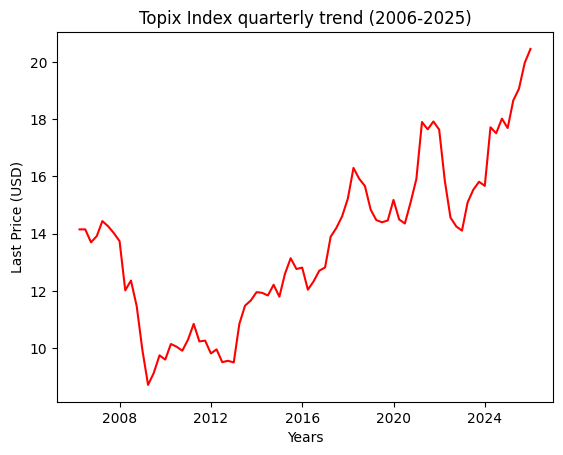

In [ ]:
plt.plot(topix.index, topix['Last Px Topix'], label='Topix', color='red')
plt.xlabel('Years')
plt.ylabel('Last Price (USD)')
plt.title('Topix Index quarterly trend (2006-2025)')
plt.show()

In [ ]:
sp500 = pd.read_excel('Daily Last Px S&P.xlsx')
sp500.head()

,Date,Last Px
0,2025-04-12 00:00:00,6854.06
1,2025-03-12 00:00:00,6849.72
2,2025-02-12 00:00:00,6829.37
3,2025-01-12 00:00:00,6812.63
4,11/28/2025,6849.09


In [ ]:
sp500.dropna(inplace=True)
sp500.head()

In [ ]:
#sp500['Date'].dtype
sp500['Date'] = pd.to_datetime(sp500['Date'])
sp500 = sp500.sort_values(['Date'])
sp500.reset_index(drop=True, inplace=True)
sp500.head()

,Date,Last Px
0,2005-12-30,1248.29
1,2006-01-02,1282.46
2,2006-01-03,1291.24
3,2006-01-05,1305.19
4,2006-01-06,1285.71


In [ ]:
# Computing the returns
returns = sp500['Last Px'].pct_change()
sp500['Px Return'] = returns
sp500.head()

In [ ]:
sp500.drop(index = [0], inplace=True)
sp500.reset_index(drop=True, inplace=True)
sp500 = sp500.set_index('Date')
sp500.head()

,Last Px,Px Return
Date,,
2006-01-02,1282.46,0.027373
2006-01-03,1291.24,0.006846
2006-01-05,1305.19,0.010804
2006-01-06,1285.71,-0.014925
2006-01-08,1270.92,-0.011503


In [ ]:
sp500 = sp500.resample('Q').mean()
sp500.head()

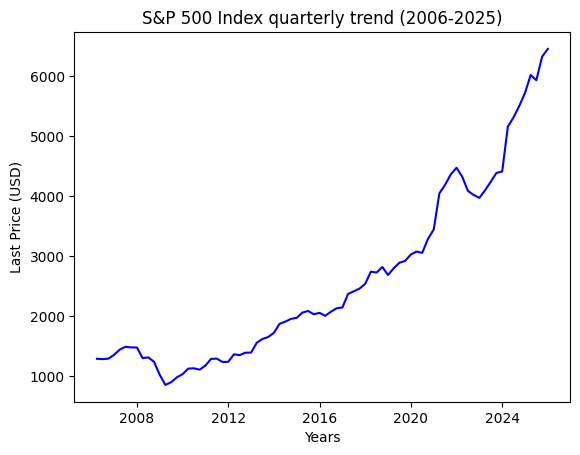

In [ ]:
plt.plot(sp500.index, sp500['Last Px'], label='S&P 500', color='blue')
plt.xlabel('Years')
plt.ylabel('Last Price (USD)')
plt.title('S&P 500 Index quarterly trend (2006-2025)')
plt.show()

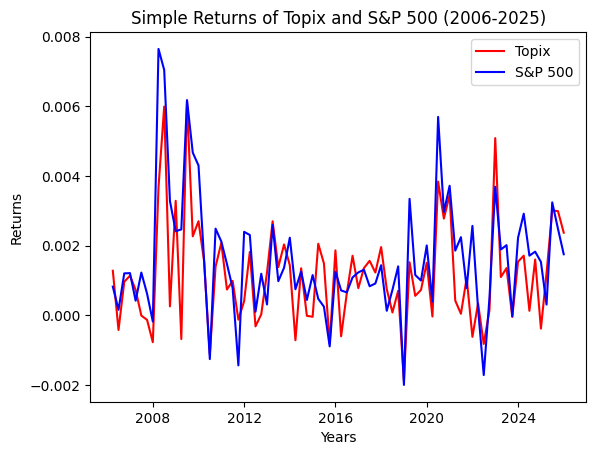

In [ ]:
# Comparing Topix and S&P500 performance over the years

plt.plot(topix.index, topix['Px Return'], label='Topix', color='red')
plt.plot(sp500.index, sp500['Px Return'], label='S&P 500', color='blue')
plt.xlabel('Years')
plt.ylabel('Returns')
plt.title('Simple Returns of Topix and S&P 500 (2006-2025)')
plt.legend()
plt.show()

## Volatility Comparison

Source: Bloomberg Terminal

### Correlation

In [ ]:
topix['Px Return'] = topix['Px Return'] * (4**0.5)
sp500['Px Return'] = sp500['Px Return'] * (4 ** 0.5)

In [ ]:
corr = topix['Px Return'].corr(sp500['Px Return'])
print(corr)

0.7753990296633297


### Standard Deviation

In [ ]:
topix = pd.read_excel('Daily Px Topix sectors.xlsx')
topix.drop(columns = ['Last Px Info', 'Last Px Energy', 'Last Px Semi', 'Last Px Pharma', 'Last Px Banks'], inplace = True)
topix.head()

,Date,Last Px Topix
0,2025-04-12 00:00:00,21.93
1,2025-03-12 00:00:00,21.49
2,2025-02-12 00:00:00,21.42
3,2025-01-12 00:00:00,21.49
4,11/28/2025,21.63


In [ ]:
topix['Date'] = pd.to_datetime(topix['Date'])
topix.sort_values(by = 'Date', inplace=True)
topix.reset_index(drop=True, inplace=True)
topix.head()

,Date,Last Px Topix
0,2005-12-30,13.98
1,2006-01-02,14.36
2,2006-01-03,14.09
3,2006-01-05,15.18
4,2006-01-06,14.08


In [ ]:
returns = topix['Last Px Topix'].pct_change()
topix['Return'] = returns
topix.head()

,Date,Last Px Topix,Return
0,2005-12-30,13.98,NaN
1,2006-01-02,14.36,0.027182
2,2006-01-03,14.09,-0.018802
3,2006-01-05,15.18,0.077360
4,2006-01-06,14.08,-0.072464


In [ ]:
topix.drop(index = [0], inplace = True)
topix.head()

,Date,Last Px Topix,Return
1,2006-01-02,14.36,0.027182
2,2006-01-03,14.09,-0.018802
3,2006-01-05,15.18,0.077360
4,2006-01-06,14.08,-0.072464
5,2006-01-08,13.66,-0.029830


In [ ]:
sp500 = pd.read_excel('Daily Last Px S&P.xlsx')
sp500.head()

,Date,Last Px
0,2025-04-12 00:00:00,6854.06
1,2025-03-12 00:00:00,6849.72
2,2025-02-12 00:00:00,6829.37
3,2025-01-12 00:00:00,6812.63
4,11/28/2025,6849.09


In [ ]:
sp500['Date'] = pd.to_datetime(sp500['Date'])
sp500.sort_values(by = 'Date', inplace=True)
sp500.reset_index(drop=True, inplace=True)
sp500.head()

,Date,Last Px
0,2005-12-30,1248.29
1,2006-01-02,1282.46
2,2006-01-03,1291.24
3,2006-01-05,1305.19
4,2006-01-06,1285.71


In [ ]:
returns = sp500['Last Px'].pct_change()
sp500['Return'] = returns
sp500.head()

,Date,Last Px,Return
0,2005-12-30,1248.29,NaN
1,2006-01-02,1282.46,0.027373
2,2006-01-03,1291.24,0.006846
3,2006-01-05,1305.19,0.010804
4,2006-01-06,1285.71,-0.014925


In [ ]:
sp500.drop(index = [0], inplace = True)
sp500.head()

,Date,Last Px,Return
1,2006-01-02,1282.46,0.027373
2,2006-01-03,1291.24,0.006846
3,2006-01-05,1305.19,0.010804
4,2006-01-06,1285.71,-0.014925
5,2006-01-08,1270.92,-0.011503


In [ ]:
topix_sd = topix['Return'].std()
sp500_sd = sp500['Return'].std()

topix_sd = topix_sd * (252**0.5) # annualizing returns
sp500_sd = sp500_sd * (252 ** 0.5) # annualizing returns

In [ ]:
topix_sd

0.7373748075842772

In [ ]:
sp500_sd

0.8081873787891746

### Garch Volatility Analysis

In [ ]:
pip install arch

In [ ]:
topix = pd.read_excel('Daily Last Px Garch Topix.xlsx')
sp500 = pd.read_excel('Daily Last Px Garch S&P.xlsx')

In [ ]:
topix['Date'] = pd.to_datetime(topix['Date'])
sp500['Date'] = pd.to_datetime(sp500['Date'])

In [ ]:
topix.sort_values(by = 'Date', inplace=True)
topix.reset_index(drop=True, inplace = True)
sp500.sort_values(by = 'Date', inplace=True)
sp500.reset_index(drop=True, inplace=True)

In [ ]:
# Computing log-returns
topix['Log Returns'] = np.log(topix['Last Px']).diff()
topix.drop(index = 0, inplace=True)
topix.reset_index(drop=True, inplace=True)
sp500['Log Returns'] = np.log(sp500['Last Px']).diff()
sp500.drop(index = 0, inplace=True)
sp500.reset_index(drop=True, inplace=True)

In [ ]:
topix.set_index('Date', inplace = True)
sp500.set_index('Date', inplace = True)

col = topix.pop('Log Returns')
topix.insert(0, 'Log Returns', col)

col = sp500.pop('Log Returns')
sp500.insert(0, 'Log Returns', col)


In [ ]:
from arch import arch_model

topix = arch_model(topix['Log Returns']*100, vol='GARCH', dist='t')
sp500 = arch_model(sp500['Log Returns']*100, vol='GARCH', dist='t')

In [ ]:
# Topix
res = topix.fit(disp='off')
print(res.summary())

                        Constant Mean - GARCH Model Results                         
Dep. Variable:                  Log Returns   R-squared:                       0.000
Mean Model:                   Constant Mean   Adj. R-squared:                  0.000
Vol Model:                            GARCH   Log-Likelihood:               -12230.3
Distribution:      Standardized Student's t   AIC:                           24470.7
Method:                  Maximum Likelihood   BIC:                           24503.1
                                              No. Observations:                 4878
Date:                      Thu, Dec 04 2025   Df Residuals:                     4877
Time:                              23:15:23   Df Model:                            1
                                Mean Model                                
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu        

In [ ]:
cond_vol_daily = res.conditional_volatility / 100 # conditional volatility
vol = cond_vol_daily * np.sqrt(252)
std_resid = res.std_resid

In [ ]:
#S&P 500
res = sp500.fit(disp='off')
print(res.summary())

                        Constant Mean - GARCH Model Results                         
Dep. Variable:                  Log Returns   R-squared:                       0.000
Mean Model:                   Constant Mean   Adj. R-squared:                  0.000
Vol Model:                            GARCH   Log-Likelihood:               -12578.5
Distribution:      Standardized Student's t   AIC:                           25167.0
Method:                  Maximum Likelihood   BIC:                           25199.6
                                              No. Observations:                 5013
Date:                      Thu, Dec 04 2025   Df Residuals:                     5012
Time:                              23:15:33   Df Model:                            1
                                Mean Model                                
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu        

In [ ]:
cond_vol_daily = res.conditional_volatility / 100
vol = cond_vol_daily * np.sqrt(252)
std_resid = res.std_resid

# Japan vs US Equity Markets

Source: Bloomberg Terminal.

## Market Data

* **Volume**: sum of the stocks of all the constituent companies of the index
* **Total Market Cap**: combined value of all listed companies > overall size and economic weight of the market
* **Average Market Cap**: total market capitalization divided by the number of listed companies > represents the 'typical' size of a company in that market

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
market_topix = pd.read_excel('Market Data Topix.xlsx')
market_topix.drop(columns = ['Unnamed: 0'], inplace = True)
years = ['2005','2006','2007','2008','2009','2010','2011','2012','2013',
         '2014','2015','2016','2017','2018','2019','2020','2021','2022','2023','2024']
market_topix.columns = years
ind = ['Avg Market Cap']
market_topix.index = ind
market_topix

,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
Avg Market Cap,317631.65,319216.78,279368.69,165127.99,182262.7,185040.46,153303.94,177898,261688.18,277450.93,304718.94,287482.83,333899.83,266314.85,304283.57,309921.36,336954.5,319170.85,395190.28,460314.02


In [ ]:
#market_nky.shape
#market_nky.index
#market_nky.columns

market_topix = market_topix.T # or market_nky.unstack()
market_topix.head()


,Avg Market Cap
2005,317631.65
2006,319216.78
2007,279368.69
2008,165127.99
2009,182262.70


In [ ]:
market_sp500 = pd.read_excel('Market Data S&P.xlsx')
market_sp500.drop(columns = ['Unnamed: 0'], inplace = True)
market_sp500.columns = years
market_sp500.index = ind
market_sp500

,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
Avg Market Cap,23048.55,26018.93,26382.8,16257.63,20570.59,23395.14,23322.05,26329.18,34104.92,37541.48,36923.51,39655.57,46941.88,43243.65,55208.38,65676.96,83311.2,66596.64,82977.33,103134.37


In [ ]:
market_sp500 = market_sp500.T
market_sp500.head()

,Avg Market Cap
2005,23048.55
2006,26018.93
2007,26382.80
2008,16257.63
2009,20570.59


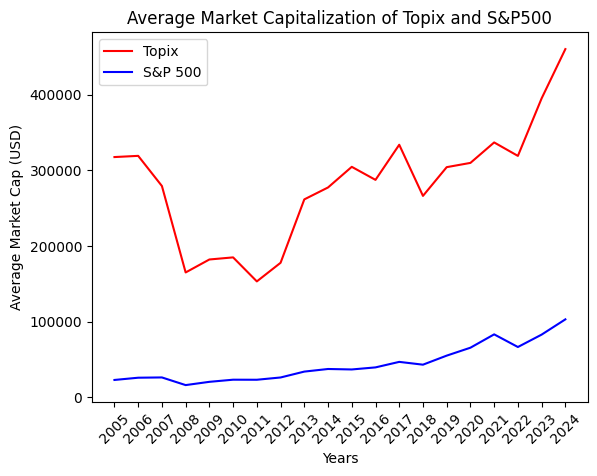

In [ ]:
plt.plot(years, market_topix['Avg Market Cap'], label='Topix', color='red')
plt.plot(years, market_sp500['Avg Market Cap'], label='S&P 500', color='blue' )
plt.xticks(rotation=45)
plt.xlabel('Years')
plt.ylabel('Average Market Cap (USD)')
plt.title('Average Market Capitalization of Topix and S&P500')
plt.legend()
plt.show()

## Profitability

Source: Bloomberg Terminal.

In [ ]:
prof_topix = pd.read_excel('profitability Topix.xlsx')
prof_topix.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21
0,Tokyo Stock Exchange Tokyo Stock Price Index T...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,CY 2007,CY 2008,CY 2009,CY 2010,CY 2011,CY 2012,CY 2013,CY 2014,...,CY 2017,CY 2018,CY 2019,CY 2020,CY 2021,CY 2022,CY 2023,CY 2024,CY 2025 Est,CY 2026 Est
3,12 Months Ending,NaN,12/31/2007,12/31/2008,12/31/2009,12/31/2010,12/30/2011,12/31/2012,12/31/2013,12/31/2014,...,12/29/2017,12/31/2018,12/31/2019,12/31/2020,12/31/2021,12/30/2022,12/29/2023,12/31/2024,12/31/2025,12/31/2026
4,Gross Margin,TRAIL_12M_GROSS_MARGIN,27.0895,27.4365,24.6587,27.0288,26.2142,25.5294,26.158,26.5081,...,28.3082,27.6259,26.0229,25.2086,25.9374,25.3272,25.7813,26.6452,NaN,NaN


In [ ]:
prof_topix.drop(index = [0,1,2,3,8,12,14,15], columns = ['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3',
                                                    'Unnamed: 4', 'Unnamed: 20', 'Unnamed: 21'], inplace=True)
years = ['2010','2011','2012','2013',
         '2014','2015','2016','2017','2018','2019','2020','2021','2022','2023','2024']

indexes = ['Gross Margin', 'EBITDA Margin', 'Operating Margin', 'Profit Margin', 'ROA', 'ROE', 'ROC', 'DPR']

prof_topix.columns = years
prof_topix.index = indexes
prof_topix

,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
Gross Margin,27.0288,26.2142,25.5294,26.158,26.5081,27.3083,27.2701,28.3082,27.6259,26.0229,25.2086,25.9374,25.3272,25.7813,26.6452
EBITDA Margin,11.6103,11.0781,10.2273,10.9748,11.2607,11.8781,11.672,12.3244,12.3414,11.737,10.4227,12.921,11.4303,12.3713,13.2302
Operating Margin,6.1673,5.7225,5.2646,6.6127,6.997,7.3665,7.186,7.8123,7.9792,7.1404,5.3275,8.3121,6.7998,7.4308,8.4782
Profit Margin,2.8787,2.2013,1.7816,3.8207,4.2005,4.5499,4.0984,5.457,5.9385,5.08,3.0091,6.2703,5.7827,5.7489,6.486
ROA,0.9506,0.6988,0.5777,1.1936,1.2984,1.3051,1.0856,1.3629,1.5443,1.278,0.6342,1.3544,1.3096,1.2986,1.4826
ROE,6.4106,4.8289,3.9703,7.5772,7.9434,8.0136,7.1467,8.597,9.3509,7.9082,4.1951,8.7074,8.3557,8.1905,9.0944
ROC,2.2667,1.6923,1.4033,2.8626,3.0604,3.1359,2.8148,3.5537,3.9581,3.3008,1.6246,3.4302,3.4147,3.303,3.7171
DPR,33.479,47.0942,57.8417,28.6325,28.9233,30.8253,37.0491,30.4286,29.5968,36.7746,65.2181,30.7801,35.7717,35.6666,34.6438


In [ ]:
prof_topix = prof_topix.T
prof_topix.head()

,Gross Margin,EBITDA Margin,Operating Margin,Profit Margin,ROA,ROE,ROC,DPR
2010,27.0288,11.6103,6.1673,2.8787,0.9506,6.4106,2.2667,33.479
2011,26.2142,11.0781,5.7225,2.2013,0.6988,4.8289,1.6923,47.0942
2012,25.5294,10.2273,5.2646,1.7816,0.5777,3.9703,1.4033,57.8417
2013,26.158,10.9748,6.6127,3.8207,1.1936,7.5772,2.8626,28.6325
2014,26.5081,11.2607,6.997,4.2005,1.2984,7.9434,3.0604,28.9233


In [ ]:
prof_sp500 = pd.read_excel('profitability S&P.xlsx')
prof_sp500.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21
0,S&P 500 INDEX (SPX) - Profitability,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,CY 2007,CY 2008,CY 2009,CY 2010,CY 2011,CY 2012,CY 2013,CY 2014,...,CY 2017,CY 2018,CY 2019,CY 2020,CY 2021,CY 2022,CY 2023,CY 2024,CY 2025 Est,CY 2026 Est
3,12 Months Ending,NaN,12/31/2007,12/31/2008,12/31/2009,12/31/2010,12/30/2011,12/31/2012,12/31/2013,12/31/2014,...,12/29/2017,12/31/2018,12/31/2019,12/31/2020,12/31/2021,12/30/2022,12/29/2023,12/31/2024,12/31/2025,12/31/2026
4,Gross Margin,TRAIL_12M_GROSS_MARGIN,31.8366,31.7419,33.0705,33.5464,32.595,33.2187,33.5286,34.359,...,35.1793,34.8518,34.9429,34.021,35.8357,34.7485,33.6012,34.004,NaN,NaN


In [ ]:
prof_sp500.drop(index = [0,1,2,3,8,12,14,15], columns = ['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3',
                                                    'Unnamed: 4', 'Unnamed: 20', 'Unnamed: 21'], inplace=True)
years = ['2010','2011','2012','2013',
         '2014','2015','2016','2017','2018','2019','2020','2021','2022','2023','2024']

indexes = ['Gross Margin', 'EBITDA Margin', 'Operating Margin', 'Profit Margin', 'ROA', 'ROE', 'ROC', 'DPR']

prof_sp500.columns = years
prof_sp500.index = indexes
prof_sp500

,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
Gross Margin,33.5464,32.595,33.2187,33.5286,34.359,34.8681,34.3398,35.1793,34.8518,34.9429,34.021,35.8357,34.7485,33.6012,34.004
EBITDA Margin,17.8712,18.1544,17.5402,17.6028,18.9051,17.2972,17.6019,19.047,19.1268,19.225,17.4032,20.5369,19.8102,19.3518,20.1723
Operating Margin,12.4522,13.2676,12.7267,12.6005,13.8066,12.1821,12.2132,13.2896,13.4314,13.0009,10.7176,15.0753,14.5452,13.4876,13.8772
Profit Margin,9.0812,9.7815,9.8242,9.9881,10.7599,10.6458,10.6559,10.7846,12.221,12.135,10.6111,13.3782,13.1631,12.429,12.7701
ROA,2.8102,3.1459,2.9691,3.0791,3.2762,2.6925,2.5875,2.8761,3.3369,3.2455,2.2393,3.6947,3.8701,3.7921,3.8592
ROE,13.4493,14.7296,13.7772,14.2589,14.8263,12.5021,12.1868,13.5285,15.6225,15.1649,11.1548,18.4589,19.3754,17.9177,17.5653
ROC,5.5208,6.4033,6.1843,6.6195,6.9973,5.7504,5.5272,6.0766,7.0534,6.6904,4.8342,8.2046,8.5707,7.8621,7.7974
DPR,31.271,29.8493,33.9678,36.8885,35.9904,47.585,49.7101,45.5068,43.4435,43.1746,58.8589,33.6347,35.0917,36.6267,37.22


In [ ]:
prof_sp500 = prof_sp500.T
prof_sp500.head()

,Gross Margin,EBITDA Margin,Operating Margin,Profit Margin,ROA,ROE,ROC,DPR
2010,33.5464,17.8712,12.4522,9.0812,2.8102,13.4493,5.5208,31.271
2011,32.595,18.1544,13.2676,9.7815,3.1459,14.7296,6.4033,29.8493
2012,33.2187,17.5402,12.7267,9.8242,2.9691,13.7772,6.1843,33.9678
2013,33.5286,17.6028,12.6005,9.9881,3.0791,14.2589,6.6195,36.8885
2014,34.359,18.9051,13.8066,10.7599,3.2762,14.8263,6.9973,35.9904


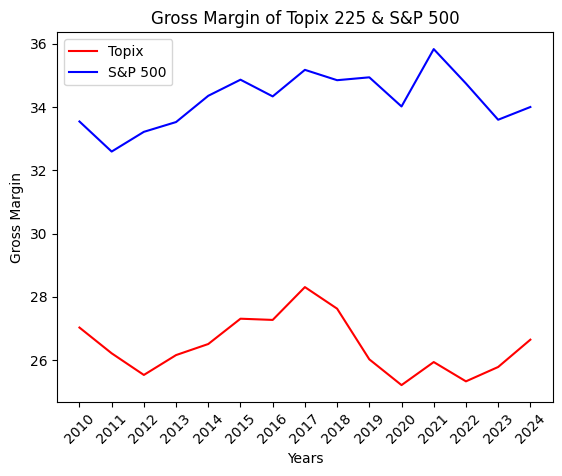

In [ ]:
plt.plot(prof_topix.index, prof_topix['Gross Margin'], label='Topix', color='red')
plt.plot(prof_sp500.index, prof_sp500['Gross Margin'], label='S&P 500', color='blue' )
plt.xticks(rotation=45)
plt.xlabel('Years')
plt.ylabel('Gross Margin')
plt.title('Gross Margin of Topix 225 & S&P 500')
plt.legend()
plt.show()

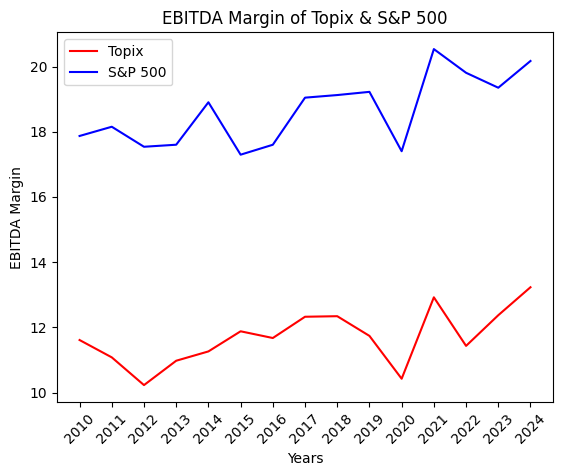

In [ ]:
plt.plot(prof_topix.index, prof_topix['EBITDA Margin'], label='Topix', color='red')
plt.plot(prof_sp500.index, prof_sp500['EBITDA Margin'], label='S&P 500', color='blue' )
plt.xticks(rotation=45)
plt.xlabel('Years')
plt.ylabel('EBITDA Margin')
plt.title('EBITDA Margin of Topix & S&P 500')
plt.legend()
plt.show()

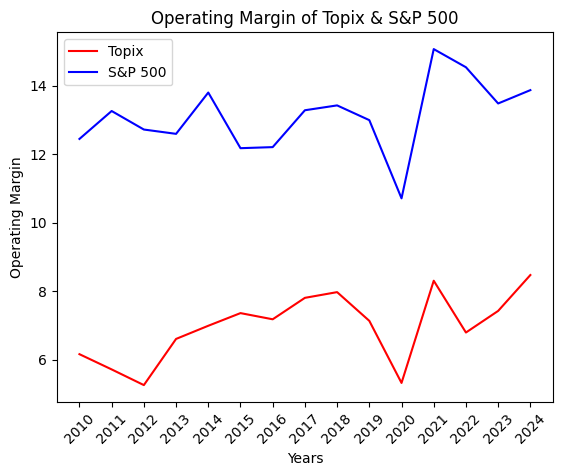

In [ ]:
plt.plot(prof_topix.index, prof_topix['Operating Margin'], label='Topix', color='red')
plt.plot(prof_sp500.index, prof_sp500['Operating Margin'], label='S&P 500', color='blue' )
plt.xticks(rotation=45)
plt.xlabel('Years')
plt.ylabel('Operating Margin')
plt.title('Operating Margin of Topix & S&P 500')
plt.legend()
plt.show()

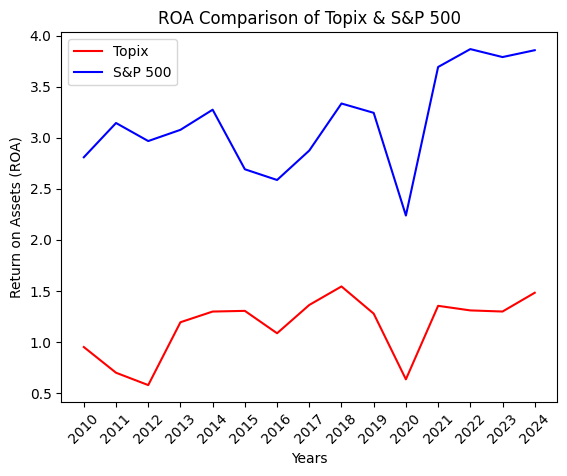

In [ ]:
plt.plot(prof_topix.index, prof_topix['ROA'], label='Topix', color='red')
plt.plot(prof_sp500.index, prof_sp500['ROA'], label='S&P 500', color='blue' )
plt.xticks(rotation=45)
plt.xlabel('Years')
plt.ylabel('Return on Assets (ROA)')
plt.title('ROA Comparison of Topix & S&P 500')
plt.legend()
plt.show()

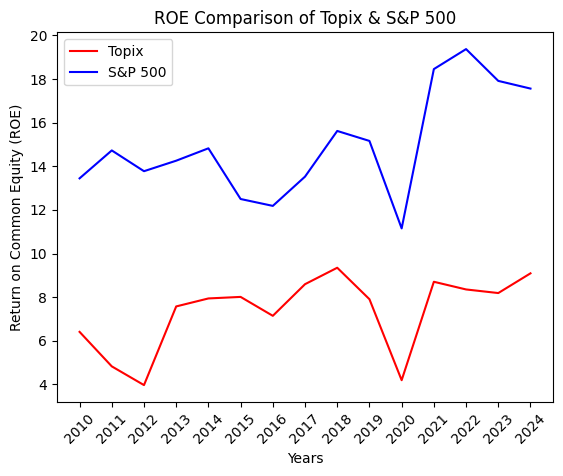

In [ ]:
plt.plot(prof_topix.index, prof_topix['ROE'], label='Topix', color='red')
plt.plot(prof_sp500.index, prof_sp500['ROE'], label='S&P 500', color='blue' )
plt.xticks(rotation=45)
plt.xlabel('Years')
plt.ylabel('Return on Common Equity (ROE)')
plt.title('ROE Comparison of Topix & S&P 500')
plt.legend()
plt.show()

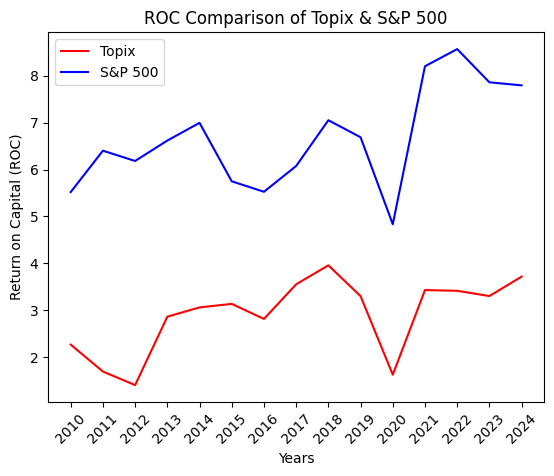

In [ ]:
plt.plot(prof_topix.index, prof_topix['ROC'], label='Topix', color='red')
plt.plot(prof_sp500.index, prof_sp500['ROC'], label='S&P 500', color='blue' )
plt.xticks(rotation=45)
plt.xlabel('Years')
plt.ylabel('Return on Capital (ROC)')
plt.title('ROC Comparison of Topix & S&P 500')
plt.legend()
plt.show()

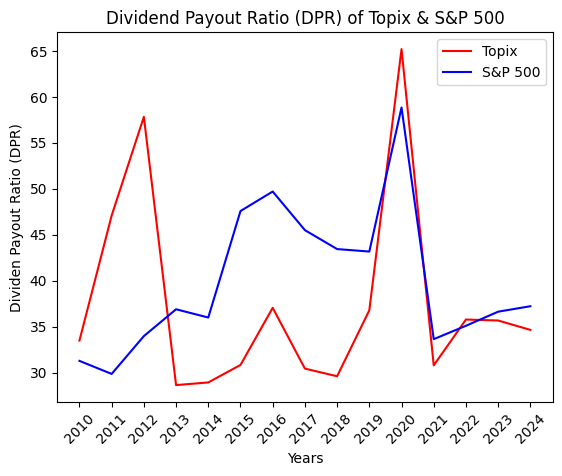

In [ ]:
plt.plot(prof_topix.index, prof_topix['DPR'], label='Topix', color='red')
plt.plot(prof_sp500.index, prof_sp500['DPR'], label='S&P 500', color='blue' )
plt.xticks(rotation=45)
plt.xlabel('Years')
plt.ylabel('Dividen Payout Ratio (DPR)')
plt.title('Dividend Payout Ratio (DPR) of Topix & S&P 500')
plt.legend()
plt.show()

## Investment

Source: Bloomberg Terminal

In [ ]:
inv_topix = pd.read_excel('valuation Topix.xlsx')
inv_topix.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21
0,Tokyo Stock Exchange Tokyo Stock Price Index T...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,CY 2007,CY 2008,CY 2009,CY 2010,CY 2011,CY 2012,CY 2013,CY 2014,...,CY 2017,CY 2018,CY 2019,CY 2020,CY 2021,CY 2022,CY 2023,CY 2024,CY 2025 Est,CY 2026 Est
3,12 Months Ending,NaN,12/31/2007,12/31/2008,12/31/2009,12/31/2010,12/30/2011,12/31/2012,12/31/2013,12/31/2014,...,12/29/2017,12/31/2018,12/31/2019,12/31/2020,12/31/2021,12/30/2022,12/29/2023,12/31/2024,12/31/2025,12/31/2026
4,Price/Earnings,PE_RATIO,18.1859,13.1341,13.1315,15.5814,14.6033,21.3317,17.1929,16.4139,...,16.0498,11.8335,15.3163,25.6269,15.3807,15.0817,16.0521,15.3499,17.73954,16.186657


In [ ]:
inv_topix.drop(index = [0,1,2,3,5,6,7,12,13,14,15,16,17,18,21],
             columns = ['Unnamed: 0', 'Unnamed: 1','Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4', 'Unnamed: 20', 'Unnamed: 21'], inplace=True)
#inv_topix.head()
years = ['2010','2011','2012','2013',
         '2014','2015','2016','2017','2018','2019','2020','2021','2022','2023','2024']
indexes = ['P/E', 'Price/Cash Flow', 'Price/Sales',
           'Price/EBITDA', 'Price/Book Value', 'DY (Net)', 'Free Cash Flow Yield']

inv_topix.index = indexes
inv_topix.columns = years
inv_topix.head()

In [ ]:
inv_topix = inv_topix.T
inv_topix.head()

,P/E,Price/Cash Flow,Price/Sales,Price/EBITDA,Price/Book Value,DY (Net),Free Cash Flow Yield
2010,15.5814,6.6477,0.5477,4.7173,1.1165,1.96009,7.5652
2011,14.6033,5.1485,0.4423,3.993,0.9102,2.55,7.0816
2012,21.3317,5.3417,0.5086,4.9731,1.055,2.20515,5.3788
2013,17.1929,9.8165,0.7286,6.6386,1.3545,1.63308,3.4889
2014,16.4139,8.3753,0.7345,6.5228,1.3381,1.74592,4.9232


In [ ]:
inv_sp500 = pd.read_excel('valuation S&p.xlsx')
inv_sp500.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21
0,S&P 500 INDEX (SPX) - Valuation,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,CY 2007,CY 2008,CY 2009,CY 2010,CY 2011,CY 2012,CY 2013,CY 2014,...,CY 2017,CY 2018,CY 2019,CY 2020,CY 2021,CY 2022,CY 2023,CY 2024,CY 2025 Est,CY 2026 Est
3,12 Months Ending,NaN,12/31/2007,12/31/2008,12/31/2009,12/31/2010,12/30/2011,12/31/2012,12/31/2013,12/31/2014,...,12/29/2017,12/31/2018,12/31/2019,12/31/2020,12/31/2021,12/30/2022,12/29/2023,12/31/2024,12/31/2025,12/31/2026
4,Price/Earnings,PE_RATIO,15.9835,11.6031,20.5207,15.7841,13.8104,14.307,16.4747,17.8617,...,21.9978,16.7128,21.1277,28.7917,25.9704,18.2394,22.765,26.4179,25.755889,22.208248


In [ ]:
inv_sp500.drop(index = [0,1,2,3,5,6,7,12,13,14,15,16,17,18,21],
             columns = ['Unnamed: 0', 'Unnamed: 1','Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4', 'Unnamed: 20', 'Unnamed: 21'], inplace=True)
#inv_sp500.head()
years = ['2010','2011','2012','2013',
         '2014','2015','2016','2017','2018','2019','2020','2021','2022','2023','2024']
indexes = ['P/E', 'Price/Cash Flow', 'Price/Sales',
           'Price/EBITDA', 'Price/Book Value', 'DY (Net)', 'Free Cash Flow Yield']

inv_sp500.index = indexes
inv_sp500.columns = years
inv_sp500.head()

,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
P/E,15.7841,13.8104,14.307,16.4747,17.8617,18.0464,20.5619,21.9978,16.7128,21.1277,28.7917,25.9704,18.2394,22.765,26.4179
Price/Cash Flow,8.5396,7.4972,8.221,9.5261,11.1597,10.6075,12.3332,14.4564,11.2634,15.3913,15.9941,19.2518,13.207,16.0981,21.9123
Price/Sales,1.36,1.2209,1.3363,1.6439,1.7813,1.7947,1.9719,2.2209,1.8835,2.304,2.752,3.1604,2.2295,2.5892,3.0212
Price/EBITDA,7.6098,6.7249,7.6186,9.3388,9.4225,10.3758,11.2026,11.6598,9.8473,11.9844,15.8131,15.389,11.2544,13.3798,14.9768
Price/Book Value,2.2477,2.0702,2.1679,2.6761,2.8038,2.7824,2.9141,3.3291,3.0218,3.6361,4.152,4.9227,3.9144,4.4927,5.1101


In [ ]:
inv_sp500 = inv_sp500.T
inv_sp500.head()

,P/E,Price/Cash Flow,Price/Sales,Price/EBITDA,Price/Book Value,DY (Net),Free Cash Flow Yield
2010,15.7841,8.5396,1.36,7.6098,2.2477,1.88,6.6759
2011,13.8104,7.4972,1.2209,6.7249,2.0702,2.12,7.202
2012,14.307,8.221,1.3363,7.6186,2.1679,2.24,6.4567
2013,16.4747,9.5261,1.6439,9.3388,2.6761,1.89,5.3316
2014,17.8617,11.1597,1.7813,9.4225,2.8038,1.95,4.8106


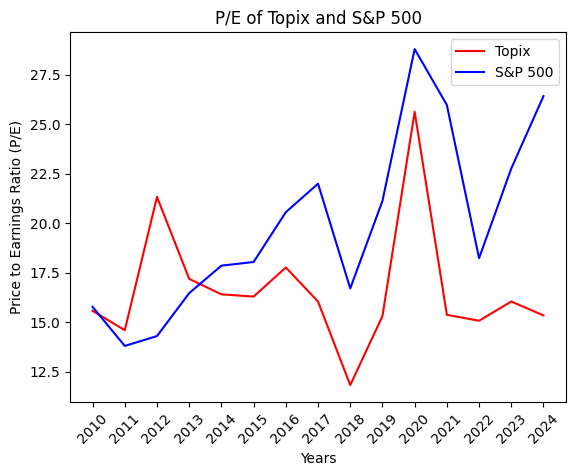

In [ ]:
plt.plot(inv_topix.index, inv_topix['P/E'], label='Topix', color='red')
plt.plot(inv_sp500.index, inv_sp500['P/E'], label='S&P 500', color='blue' )
plt.xticks(rotation=45)
plt.xlabel('Years')
plt.ylabel('Price to Earnings Ratio (P/E)')
plt.title('P/E of Topix and S&P 500')
plt.legend()
plt.show()

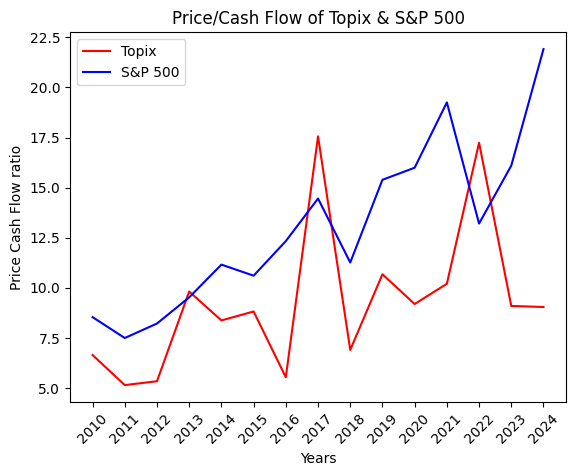

In [ ]:
plt.plot(inv_topix.index, inv_topix['Price/Cash Flow'], label='Topix', color='red')
plt.plot(inv_sp500.index, inv_sp500['Price/Cash Flow'], label='S&P 500', color='blue' )
plt.xticks(rotation=45)
plt.xlabel('Years')
plt.ylabel('Price Cash Flow ratio')
plt.title('Price/Cash Flow of Topix & S&P 500')
plt.legend()
plt.show()

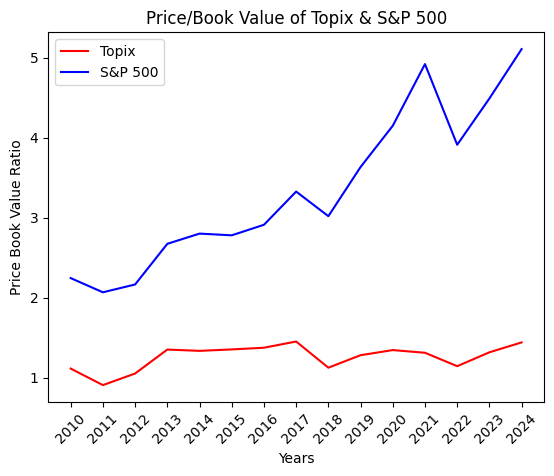

In [ ]:
plt.plot(inv_topix.index, inv_topix['Price/Book Value'], label='Topix', color='red')
plt.plot(inv_sp500.index, inv_sp500['Price/Book Value'], label='S&P 500', color='blue' )
plt.xticks(rotation=45)
plt.xlabel('Years')
plt.ylabel('Price Book Value Ratio')
plt.title('Price/Book Value of Topix & S&P 500')
plt.legend()
plt.show()

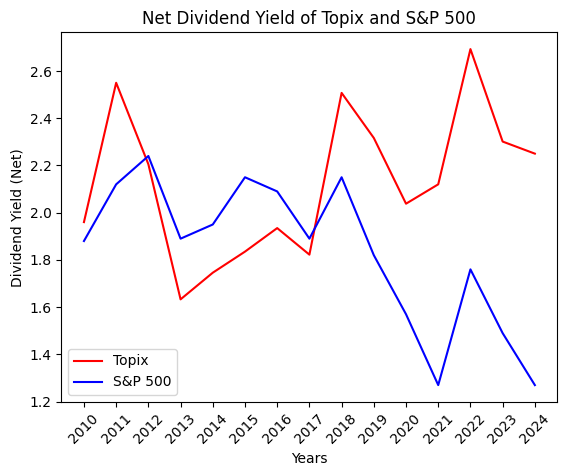

In [ ]:
plt.plot(inv_topix.index, inv_topix['DY (Net)'], label='Topix', color='red')
plt.plot(inv_sp500.index, inv_sp500['DY (Net)'], label='S&P 500', color='blue' )
plt.xticks(rotation=45)
plt.xlabel('Years')
plt.ylabel('Dividend Yield (Net)')
plt.title('Net Dividend Yield of Topix and S&P 500')
plt.legend()
plt.show()

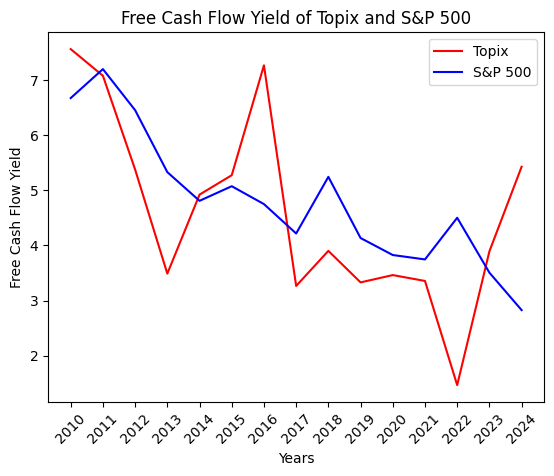

In [ ]:
plt.plot(inv_topix.index, inv_topix['Free Cash Flow Yield'], label='Topix', color='red')
plt.plot(inv_sp500.index, inv_sp500['Free Cash Flow Yield'], label='S&P 500', color='blue' )
plt.xticks(rotation=45)
plt.xlabel('Years')
plt.ylabel('Free Cash Flow Yield')
plt.title('Free Cash Flow Yield of Topix and S&P 500')
plt.legend()
plt.show()

## Leverage and Liquidity

In [ ]:
lev_topix = pd.read_excel('leverage & liquidity Topix.xlsx')
lev_topix.drop(index = [0,1,2,3,4,5,7,11], columns = ['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4', 'Unnamed: 20', 'Unnamed: 21'], inplace = True)
years = ['2010','2011','2012','2013',
         '2014','2015','2016','2017','2018','2019','2020','2021','2022','2023','2024']
lev_topix.columns = years
ind = ['Net Debt to EBITDA', 'Total Debt to EV', 'Total Debt to Total Equity', 'Total Debt to Total Asset']
lev_topix.index = ind
lev_topix.head()


,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
Net Debt to EBITDA,5.2011,5.3132,5.5497,4.1677,3.5822,2.7464,1.5301,0.3089,0.0719,0.2101,-0.0009,-0.3523,-0.6713,-0.5947,-0.5964
Total Debt to EV,0.7146,0.8229,0.7752,0.6998,0.7204,0.7652,0.8779,0.906,1.1448,1.0216,1.1489,1.1887,1.4492,1.1768,1.0301
Total Debt to Total Equity,157.812,158.5197,158.4319,142.1385,139.2212,136.5228,135.556,125.1847,121.2781,125.083,144.0175,140.0155,131.6621,134.3925,131.8545
Total Debt to Total Asset,25.5079,25.3043,25.1318,24.4816,24.6813,24.0173,22.192,21.3185,21.3672,21.5177,23.0708,23.034,21.7991,22.5407,22.6805


In [ ]:
lev_topix = lev_topix.T
lev_topix.head()

,Net Debt to EBITDA,Total Debt to EV,Total Debt to Total Equity,Total Debt to Total Asset
2010,5.2011,0.7146,157.812,25.5079
2011,5.3132,0.8229,158.5197,25.3043
2012,5.5497,0.7752,158.4319,25.1318
2013,4.1677,0.6998,142.1385,24.4816
2014,3.5822,0.7204,139.2212,24.6813


In [ ]:
lev_sp500 = pd.read_excel('leverage & liquidity S&P.xlsx')
lev_sp500.drop(index = [0,1,2,3,4,5,7,11], columns = ['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4', 'Unnamed: 20', 'Unnamed: 21'], inplace = True)
years = ['2010','2011','2012','2013',
         '2014','2015','2016','2017','2018','2019','2020','2021','2022','2023','2024']
lev_sp500.columns = years
ind = ['Net Debt to EBITDA', 'Total Debt to EV', 'Total Debt to Total Equity', 'Total Debt to Total Asset']
lev_sp500.index = ind
lev_sp500.head()

,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
Net Debt to EBITDA,2.1506,1.5616,1.5173,1.2053,1.1117,1.4373,1.6066,1.4967,1.4419,1.8654,1.6076,1.0416,1.2523,1.4283,1.4938
Total Debt to EV,0.5007,0.5095,0.4616,0.372,0.3501,0.3669,0.357,0.3211,0.3444,0.2959,0.2783,0.2327,0.2833,0.2509,0.2175
Total Debt to Total Equity,137.7057,123.3732,114.6008,107.6711,104.9131,110.0047,112.3094,113.9168,112.7889,117.615,122.5407,116.1433,116.617,118.9829,116.9674
Total Debt to Total Asset,29.4523,27.1238,25.6181,24.0955,23.9728,24.5275,24.7499,25.19,25.0627,26.2528,25.5039,24.1937,24.3101,26.2076,26.6875


In [ ]:
lev_sp500 = lev_sp500.T
lev_sp500.head()

,Net Debt to EBITDA,Total Debt to EV,Total Debt to Total Equity,Total Debt to Total Asset
2010,2.1506,0.5007,137.7057,29.4523
2011,1.5616,0.5095,123.3732,27.1238
2012,1.5173,0.4616,114.6008,25.6181
2013,1.2053,0.372,107.6711,24.0955
2014,1.1117,0.3501,104.9131,23.9728


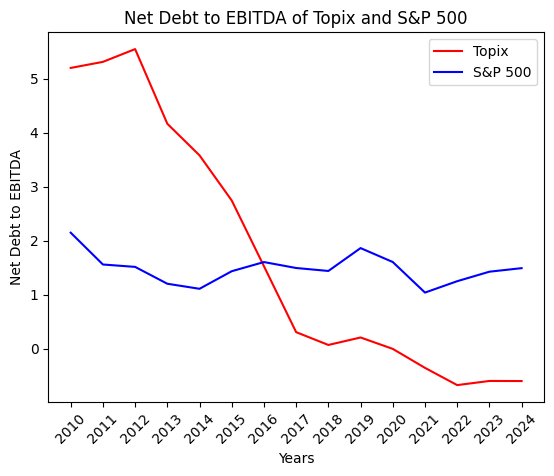

In [ ]:
plt.plot(lev_topix.index, lev_topix['Net Debt to EBITDA'], label='Topix', color='red')
plt.plot(lev_sp500.index, lev_sp500['Net Debt to EBITDA'], label='S&P 500', color='blue' )
plt.xticks(rotation=45)
plt.xlabel('Years')
plt.ylabel('Net Debt to EBITDA')
plt.title('Net Debt to EBITDA of Topix and S&P 500')
plt.legend()
plt.show()

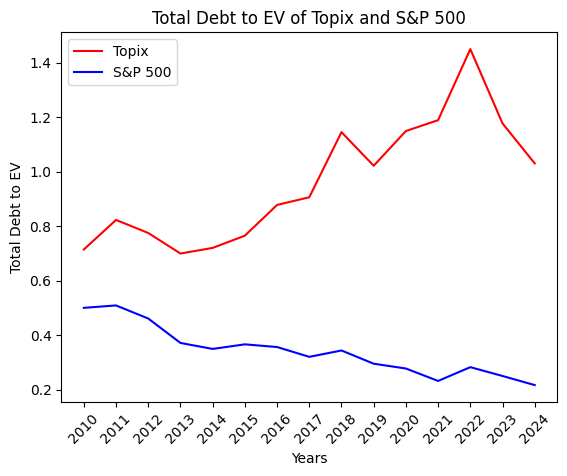

In [ ]:
plt.plot(lev_topix.index, lev_topix['Total Debt to EV'], label='Topix', color='red')
plt.plot(lev_sp500.index, lev_sp500['Total Debt to EV'], label='S&P 500', color='blue' )
plt.xticks(rotation=45)
plt.xlabel('Years')
plt.ylabel('Total Debt to EV')
plt.title('Total Debt to EV of Topix and S&P 500')
plt.legend()
plt.show()

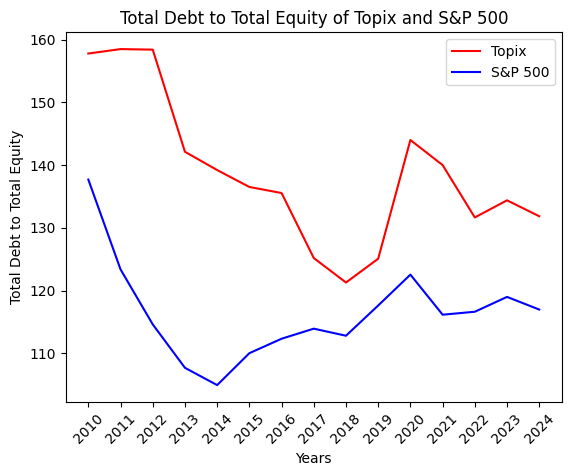

In [ ]:
plt.plot(lev_topix.index, lev_topix['Total Debt to Total Equity'], label='Topix', color='red')
plt.plot(lev_sp500.index, lev_sp500['Total Debt to Total Equity'], label='S&P 500', color='blue' )
plt.xticks(rotation=45)
plt.xlabel('Years')
plt.ylabel('Total Debt to Total Equity')
plt.title('Total Debt to Total Equity of Topix and S&P 500')
plt.legend()
plt.show()

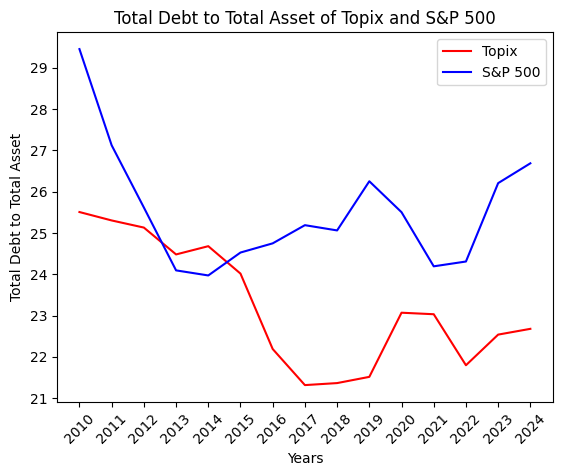

In [ ]:
plt.plot(lev_topix.index, lev_topix['Total Debt to Total Asset'], label='Topix', color='red')
plt.plot(lev_sp500.index, lev_sp500['Total Debt to Total Asset'], label='S&P 500', color='blue' )
plt.xticks(rotation=45)
plt.xlabel('Years')
plt.ylabel('Total Debt to Total Asset')
plt.title('Total Debt to Total Asset of Topix and S&P 500')
plt.legend()
plt.show()

# Sectors Comparison

## P/E Ratio Comparison

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
pe = pd.read_excel('PE Topix sectors.xlsx')
pe.head()

,Date,PE Topix,PE Pharma,PE Banking,PE Semi,PE Info,PE Energy
0,2025-04-12 00:00:00,17.6991,20.3327,14.2379,27.8979,15.8204,8.5061
1,2025-03-12 00:00:00,17.3646,20.0605,13.9632,27.2502,15.3855,8.5257
2,2025-02-12 00:00:00,17.3998,20.2361,14.2222,27.0226,15.2594,8.6497
3,2025-01-12 00:00:00,17.3856,20.2923,13.9679,26.8558,15.4709,8.7819
4,11/28/2025,17.5942,20.5856,13.8073,27.4064,15.6627,9.0663


In [ ]:
pe['Date'] = pd.to_datetime(pe['Date'])
pe.sort_values(by = 'Date', inplace = True)
pe.reset_index(drop = True, inplace = True)
pe.head()

,Date,PE Topix,PE Pharma,PE Banking,PE Semi,PE Info,PE Energy
0,2015-04-12,16.5804,31.3376,10.4713,19.4485,17.9460,41.8422
1,2015-07-12,16.6983,31.6258,10.4965,19.6652,17.9411,42.2632
2,2015-08-12,16.5247,31.3174,10.3683,19.4111,17.9202,42.3596
3,2015-09-12,16.3857,30.7735,10.3201,19.2089,17.9669,42.4099
4,2015-10-12,16.2267,30.4663,10.2363,18.9611,17.8635,41.9483


In [ ]:
pe = pe.set_index('Date')
pe.head()

,PE Topix,PE Pharma,PE Banking,PE Semi,PE Info,PE Energy
Date,,,,,,
2015-04-12,16.5804,31.3376,10.4713,19.4485,17.9460,41.8422
2015-07-12,16.6983,31.6258,10.4965,19.6652,17.9411,42.2632
2015-08-12,16.5247,31.3174,10.3683,19.4111,17.9202,42.3596
2015-09-12,16.3857,30.7735,10.3201,19.2089,17.9669,42.4099
2015-10-12,16.2267,30.4663,10.2363,18.9611,17.8635,41.9483


In [ ]:
pe = pe.resample('Q').mean() # picking the average of each quarter
# 'resample' is used to change the time frequency > can only be used for the index
# must resample the whole dataset, not just the dates

In [ ]:
for c in pe.columns:
    print(repr(c)) #looking for hidden characters in columns names

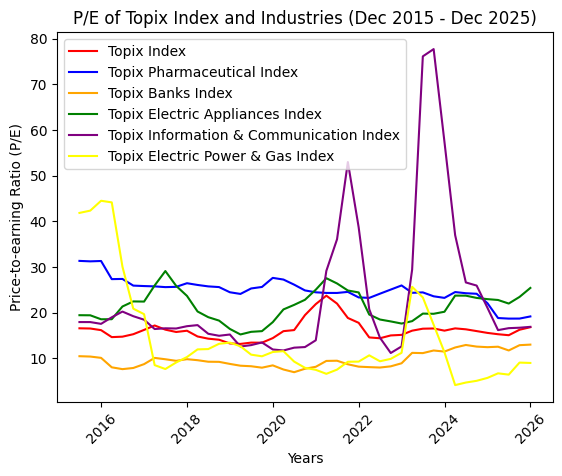

In [ ]:
plt.plot(pe.index, pe['PE Topix'], label = 'Topix Index', color = 'red')
plt.plot(pe.index, pe['PE Pharma'], label = 'Topix Pharmaceutical Index', color = 'blue')
plt.plot(pe.index, pe['PE Banking'], label = 'Topix Banks Index', color = 'orange')
plt.plot(pe.index, pe['PE Semi'], label = 'Topix Electric Appliances Index', color = 'green')
plt.plot(pe.index, pe['PE Info'], label = 'Topix Information & Communication Index', color = 'purple')
plt.plot(pe.index, pe['PE Energy'], label = 'Topix Electric Power & Gas Index', color = 'yellow')
plt.xticks(rotation=45)
plt.xlabel('Years')
plt.ylabel('Price-to-earning Ratio (P/E)')
plt.title('P/E of Topix Index and Industries (Dec 2015 - Dec 2025)')
plt.legend()
plt.show()

## Return Comparison

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
sectors = pd.read_excel('Daily Px Topix sectors.xlsx')
sectors['Date'] = pd.to_datetime(sectors['Date'])
sectors

In [ ]:
sectors.sort_values(by = 'Date', inplace = True)
sectors.reset_index(drop = True, inplace = True)

In [ ]:
sectors = sectors.set_index('Date')
sectors.head()

,Last Px Info,Last Px Energy,Last Px Semi,Last Px Pharma,Last Px Banks,Last Px Topix,Last Px Machinery,Last Px Chemicals,Last Px Real Estate,Last Px Insurance,Last Px Retail,Last Px Food
Date,,,,,,,,,,,,
2005-12-30,17.75,7.04,17.67,15.726,3.92,13.98,11.44,11.006,14.52,10.638,9.502,8.08
2006-01-02,16.95,7.20,19.00,16.134,4.02,14.36,12.32,11.846,14.58,11.236,9.351,8.30
2006-01-03,16.19,7.75,18.37,15.865,3.99,14.09,12.03,11.345,14.16,11.620,8.735,8.50
2006-01-05,17.03,7.98,20.47,18.119,4.17,15.18,13.39,12.279,15.08,12.020,9.109,9.59
2006-01-06,16.91,7.87,18.72,17.893,3.81,14.08,12.07,11.380,13.43,10.840,8.272,9.35


In [ ]:
sectors = sectors.resample('Q').mean()

In [ ]:
sectors['Info Return'] = sectors['Last Px Info'].pct_change()
sectors['Energy Return'] = sectors['Last Px Energy'].pct_change()
sectors['Semi Return'] = sectors['Last Px Semi'].pct_change()
sectors['Pharma Return'] = sectors['Last Px Pharma'].pct_change()
sectors['Banks Return'] = sectors['Last Px Banks'].pct_change()
sectors['Topix Return'] = sectors['Last Px Topix'].pct_change()
sectors['Machinery Return'] = sectors['Last Px Machinery'].pct_change()
sectors['Chemicals Return'] = sectors['Last Px Chemicals'].pct_change()
sectors['Real Estate Return'] = sectors['Last Px Real Estate'].pct_change()
sectors['Retail Return'] = sectors['Last Px Retail'].pct_change()

In [ ]:
sectors.dropna()
sectors.tail()

,Last Px Info,Last Px Energy,Last Px Semi,Last Px Pharma,Last Px Banks,Last Px Topix,Last Px Machinery,Last Px Chemicals,Last Px Real Estate,Last Px Insurance,...,Info Return,Energy Return,Semi Return,Pharma Return,Banks Return,Topix Return,Machinery Return,Chemicals Return,Real Estate Return,Retail Return
Date,,,,,,,,,,,,,,,,,,,,,
2024-12-31,38.452063,3.452381,31.020476,24.532540,2.203968,17.693016,20.752698,16.549429,12.507302,16.576317,...,-0.004452,-0.060790,-0.016285,-0.057526,0.032787,-0.018200,-0.009630,-0.053873,-0.061084,0.021851
2025-03-31,42.164576,3.373729,32.993220,23.133339,2.649322,18.658814,22.288814,15.594237,13.441864,18.121169,...,0.096549,-0.022782,0.063595,-0.057034,0.202069,0.054586,0.074020,-0.057717,0.074721,0.060671
2025-06-30,44.798500,3.448167,33.358000,23.242867,2.612167,19.068333,23.269833,15.599100,14.178500,18.708283,...,0.062468,0.022064,0.011056,0.004735,-0.014024,0.021948,0.044014,0.000312,0.054802,0.059922
2025-09-30,47.745763,3.741695,34.693729,23.363661,2.810169,19.971186,25.007288,16.262847,14.800000,19.413949,...,0.065789,0.085126,0.040042,0.005197,0.075800,0.047348,0.074666,0.042550,0.043834,0.014204
2025-12-31,49.076383,3.902128,37.242766,23.427128,2.855745,20.457234,25.908511,16.179532,15.098936,18.594851,...,0.027869,0.042877,0.073473,0.002716,0.016218,0.024337,0.036038,-0.005123,0.020198,0.009645


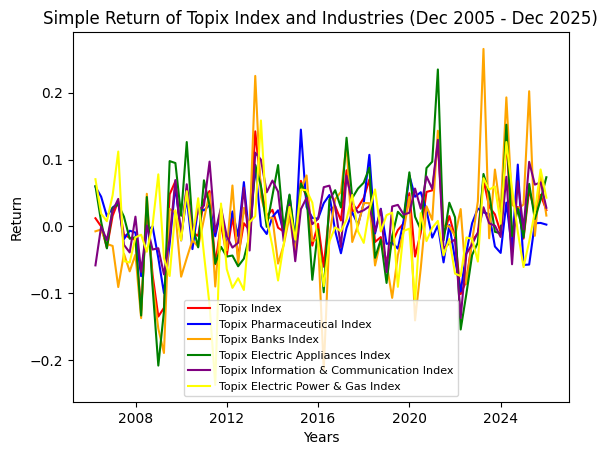

In [ ]:
plt.plot(sectors.index, sectors['Topix Return'], label = 'Topix Index', color = 'red')
plt.plot(sectors.index, sectors['Pharma Return'], label = 'Topix Pharmaceutical Index', color = 'blue')
plt.plot(sectors.index, sectors['Banks Return'], label = 'Topix Banks Index', color = 'orange')
plt.plot(sectors.index, sectors['Semi Return'], label = 'Topix Electric Appliances Index', color = 'green')
plt.plot(sectors.index, sectors['Info Return'], label = 'Topix Information & Communication Index', color = 'purple')
plt.plot(sectors.index, sectors['Energy Return'], label = 'Topix Electric Power & Gas Index', color = 'yellow')
plt.xlabel('Years')
plt.ylabel('Return')
plt.title('Simple Return of Topix Index and Industries (Dec 2005 - Dec 2025)')
plt.legend(markerscale=0.8, fontsize=8)
plt.show()

### Correlation

In [ ]:
import seaborn as sns

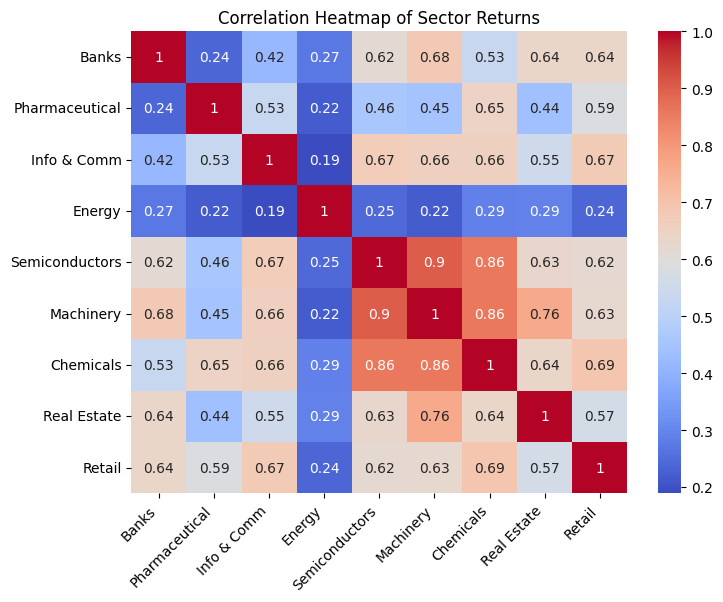

In [ ]:
col = ['Banks Return', 'Pharma Return', 'Info Return', 'Energy Return', 'Semi Return', 'Machinery Return', 'Chemicals Return', 'Real Estate Return', 'Retail Return']
corr_matrix = sectors[col].corr()

plt.figure(figsize=(8, 6))
ax = sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

new_labels = ['Banks', 'Pharmaceutical', 'Info & Comm', 'Energy', 'Semiconductors', 'Machinery', 'Chemicals', 'Real Estate','Retail']

ax.set_xticklabels(new_labels, rotation=45, ha='right')
ax.set_yticklabels(new_labels, rotation=0)

plt.title("Correlation Heatmap of Sector Returns")
plt.show()


### Standard Deviation

In [ ]:
sectors = pd.read_excel('Daily Px Topix sectors.xlsx')
sectors['Date'] = pd.to_datetime(sectors['Date'])
sectors.head()

,Date,Last Px Info,Last Px Energy,Last Px Semi,Last Px Pharma,Last Px Banks,Last Px Topix,Last Px Machinery,Last Px Chemicals,Last Px Real Estate,Last Px Insurance,Last Px Retail,Last Px Food
0,2025-04-12,49.48,4.25,41.30,24.726,3.29,21.93,27.62,16.534,16.59,18.871,14.928,16.00
1,2025-03-12,48.06,4.26,40.29,24.365,3.22,21.49,26.86,16.275,16.45,18.566,14.678,15.99
2,2025-02-12,47.42,4.30,39.74,24.449,3.26,21.42,26.52,16.263,16.22,18.450,14.869,16.10
3,2025-01-12,48.26,4.38,39.65,24.612,3.22,21.49,26.79,16.305,16.37,18.428,14.908,16.14
4,2025-11-28,48.59,4.50,40.24,24.830,3.16,21.63,26.94,16.435,16.71,18.334,15.013,16.21


In [ ]:
sectors.sort_values(by = 'Date', inplace = True)
sectors.reset_index(drop = True, inplace = True)

In [ ]:
sectors = sectors.set_index('Date')
sectors.head()

,Last Px Info,Last Px Energy,Last Px Semi,Last Px Pharma,Last Px Banks,Last Px Topix,Last Px Machinery,Last Px Chemicals,Last Px Real Estate,Last Px Insurance,Last Px Retail,Last Px Food
Date,,,,,,,,,,,,
2005-12-30,17.75,7.04,17.67,15.726,3.92,13.98,11.44,11.006,14.52,10.638,9.502,8.08
2006-01-02,16.95,7.20,19.00,16.134,4.02,14.36,12.32,11.846,14.58,11.236,9.351,8.30
2006-01-03,16.19,7.75,18.37,15.865,3.99,14.09,12.03,11.345,14.16,11.620,8.735,8.50
2006-01-05,17.03,7.98,20.47,18.119,4.17,15.18,13.39,12.279,15.08,12.020,9.109,9.59
2006-01-06,16.91,7.87,18.72,17.893,3.81,14.08,12.07,11.380,13.43,10.840,8.272,9.35


In [ ]:
sectors['Info Return'] = sectors['Last Px Info'].pct_change()
sectors['Energy Return'] = sectors['Last Px Energy'].pct_change()
sectors['Semi Return'] = sectors['Last Px Semi'].pct_change()
sectors['Pharma Return'] = sectors['Last Px Pharma'].pct_change()
sectors['Banks Return'] = sectors['Last Px Banks'].pct_change()
sectors['Topix Return'] = sectors['Last Px Topix'].pct_change()
sectors['Machinery Return'] = sectors['Last Px Machinery'].pct_change()
sectors['Chemicals Return'] = sectors['Last Px Chemicals'].pct_change()
sectors['Real Estate Return'] = sectors['Last Px Real Estate'].pct_change()
sectors['Retail Return'] = sectors['Last Px Retail'].pct_change()

In [ ]:
info_std = sectors['Info Return'].std()
energy_std = sectors['Energy Return'].std()
semi_std = sectors['Semi Return'].std()
pharma_std = sectors['Pharma Return'].std()
banks_std = sectors['Banks Return'].std()
topix_std = sectors['Topix Return'].std()
machinery_std = sectors['Machinery Return'].std()
chemicals_std = sectors['Chemicals Return'].std()
realestate_std = sectors['Real Estate Return'].std()
retail_std = sectors['Retail Return'].std()


info_std = info_std * (252**0.5)
enerrgy_std = energy_std * (252**0.5)
semi_std = semi_std * (252**0.5)
pharma_std = pharma_std * (252**0.5)
banks_std = banks_std * (252**0.5)
topix_std = topix_std * (252**0.5)
machinery_std = machinery_std * (252**0.5)
chemicals_std = chemicals_std * (252**0.5)
realestate_std = realestate_std * (252**0.5)
retail_std = banks_std * (252**0.5)

In [ ]:
topix_std

0.7373748075842772

In [ ]:
info_std

0.7199481859077503

In [ ]:
energy_std

0.0651398466049956

In [ ]:
semi_std

1.0899458686426824

In [ ]:
pharma_std

0.6512699548004689

In [ ]:
banks_std

1.0349663354180114

In [ ]:
retail_std

16.429581233039514

In [ ]:
machinery_std

1.0497903845700571

In [ ]:
realestate_std

1.1451827433338468

In [ ]:
chemicals_std

0.798110140271968